# FDA HW1 part1
E94041220 郭濯瑀

Dataset:https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path = "./Reviews.csv"
pd_data = pd.read_csv(data_path)
type(pd_data)

pandas.core.frame.DataFrame

Group the same UserId and count their size.

In [9]:
pd_data = pd_data[:10000]
userid = pd_data.groupby(['UserId'])
user_count = userid.size()
user_count = user_count.reset_index(name='Score count')
user_count


,UserId,Score count
0,A10012K7DF3SBQ,1
1,A1001TYW5FZYD9,1
2,A1008DPSP6KC9J,1
3,A101C99CG8EFUH,1
4,A102XKYZE9Q9L4,1
5,A10317LUD1C1VJ,1
6,A10389F7LRIZWQ,1
7,A103EZCS9H8WW1,1
8,A103U3KR4L2ZXT,1
9,A104Y49ZQ4CYJ2,1


## 1. Top-10 Reviewer

In [3]:
sort_user = list(user_count.sort_values(by=['Score count'], ascending=False).UserId)
#print(sort_user)

ans_data = { 'UserId': [], 'ProfileName': [], 'Score count': [],'Score mean': []}

for user in sort_user:
    user_data = pd_data.loc[pd_data['UserId'] == user]
    count = user_data.shape[0] 
    profile_name = user_data['ProfileName'].values[0]
    score_mean = np.mean(user_data['Score'].values)
    ans_data['UserId'].append(user)
    ans_data['ProfileName'].append(profile_name)
    ans_data['Score count'].append(count)
    ans_data['Score mean'].append(score_mean)

ans = pd.DataFrame(ans_data)

ans.head(10)


,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


## 2. Plot score distribution for the user with the most number of reviews

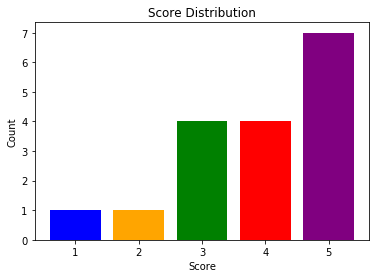

In [10]:
topuser = pd_data.loc[pd_data['ProfileName'] == 'c2']
y = [list(topuser['Score']).count(i) for i in range(1,6)]
plt.bar(range(1,6),y,color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')
plt.show()

## 3. Plot pandas Series DataFrame (Time->Date)

<BarContainer object of 10 artists>

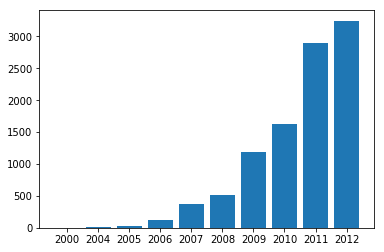

In [5]:
import time
dates = []
for i in pd_data['Time']:
    dates.append(time.strftime('%Y', time.localtime(i)))
frame = {
    "dates":dates
}
frame = pd.DataFrame(frame)    
out = frame.groupby(['dates'])
#print(out.size())

plt.bar(out.size().index, out.size())

## 4. Plot HeatMap using seaborn

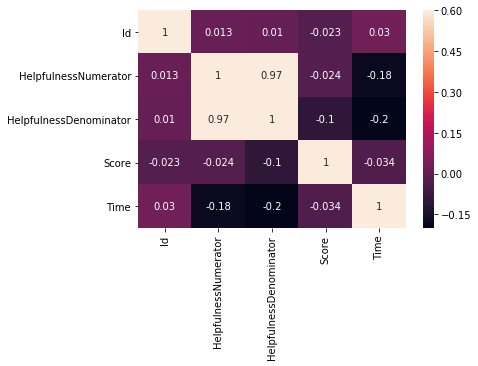

In [6]:
import seaborn as sns
Id = pd_data['Id']
HelpfulnessNumerator = pd_data['HelpfulnessNumerator']
HelpfulnessDenominator = pd_data['HelpfulnessDenominator']
Score = pd_data['Score']
Time = pd_data['Time']

ans = pd.concat([Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time], axis=1)
correlation = np.corrcoef([ans['Id'], ans['HelpfulnessNumerator'], ans['HelpfulnessDenominator'], ans['Score'], ans['Time']])

ans = pd.DataFrame(correlation)
ans.columns = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
ans.index = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']

sns.heatmap(ans, annot=True, vmin=-0.2, vmax=0.6)

## 5. Helpful percent

(array([5502.,    0.,    0.,    0.,    0.,   65.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

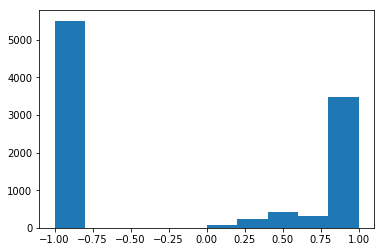

In [11]:
percent = []

for numerator, denominator in zip(pd_data['HelpfulnessNumerator'], pd_data['HelpfulnessDenominator']):
    if denominator == 0 or numerator == 0: 
        percent.append(-1)
    elif numerator > denominator: 
        pass
    else:
        percent.append(numerator/denominator)
plt.hist(percent)